<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/07Apr20_1_pdfs_and_cdfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asking Questions of a Random VAriable

### Introduction

In the last lesson, we learned about about random variables.  We defined a random variable as a variable whose values depend on outcomes of a random phenomenon.  We also learned about the probability distribution function of a random variable, which is a function that provides the probabilities of occurrence of different possible outcomes in an experiment.  

In this lesson, we'll go further into working with a random variable's probability distribution function, as well as learn about the cumulative distribution function.

### Loading the data

Ok let's load up our data.

In [0]:
import pandas as pd 
url = "https://raw.githubusercontent.com/jigsawlabs-student/modeling-distributions/master/scores_grade_eight_2015.csv"
df = pd.read_csv(url, index_col = 0)

In [0]:
df[:3]

,DBN,School Name,Number Tested,Mean Scale Score,# Level 1,# Level 2,# Level 3,# Level 4
53,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,59,298.0,21.0,24.0,9.0,5.0
136,01M140,P.S. 140 NATHAN STRAUS,58,285.0,28.0,26.0,4.0,0.0
169,01M184,P.S. 184M SHUANG WEN,56,360.0,0.0,4.0,13.0,39.0


From here, we can select a sample from our dataframe.

In [0]:
sample_df = df.sample(n = 100, random_state = 5)

In [0]:
sample_df[:3]

,DBN,School Name,Number Tested,Mean Scale Score,# Level 1,# Level 2,# Level 3,# Level 4
13675,31R027,I.S. 027 ANNING S. PRALL,385,295.0,158.0,133.0,63.0,31.0
6491,14K318,I.S. 318 EUGENIO MARIA DE HOSTOS,328,289.0,116.0,184.0,27.0,1.0
10264,24Q061,I.S. 061 LEONARDO DA VINCI,768,295.0,295.0,318.0,102.0,53.0


### Defining our random variable

Now remember that we are motivated to get a sense of the math score of assigned school.  To do answer this question, we defined a random variable $X$ where:

* $X = $ the score of the assigned school 

Now there are two main categories of questions that we ask of a random variable.  

1. What's the probability that our random variable **equals** a specific value
2. What's the probability that our random variable **is less than** a specific value

### Probability Distribution Function

To answer questions in the first catgeory, we use the probability distribution function.  When our random variable is continuous, we call this the probability density function (PDF).

> A **probability distribution function** is a  function that provides the probabilities of occurrence of different possible outcomes for a random variable.

We defined our PDF to equal the relative frequencies of our samples.  

In [0]:
avg_score = sample_df['Mean Scale Score']

avg_score.value_counts(normalize = True).iloc[:3]

295.0    0.050505
279.0    0.050505
283.0    0.040404
Name: Mean Scale Score, dtype: float64

And we plotted our PDF with the following code.

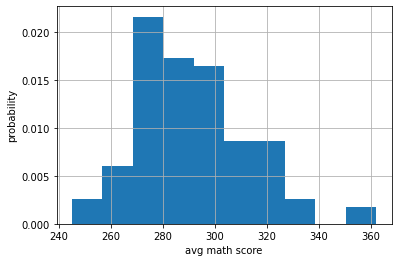

In [0]:
import matplotlib.pyplot as plt

ax = avg_score.hist(density = True)
ax.set(xlabel = 'avg math score', ylabel = 'probability')
pdf_fig = plt.gcf()

Once we have our PDF, we can answer questions like the following:

* What's the probability that the Emmet's assigned school has an average score of 280.  

* Or mathematically:  $P(X = 280)$

To answer this question, we can go to our value counts method and find the probability at this value:

In [0]:
avg_score.value_counts(normalize = True).loc[280]

0.030303030303030304

### Cumulative Distribution Function

So we used a PDF to answer the question of, what's the probability that our random variable equals a specific value.  

But we often want to know, what's the probability that our random variable is less than a specific value.  Or for example, what's the probability that Emmet's assigned school has a score less than 270.

For questions of that form, we use the cumulative distribution function or the CDF.

> The **cumulative distribution function** (CDF) of a random variable $X$ is the probability that $X$ will take a value less than or equal to a value $x$.

So let's find the probability that Emmet's assigned school has a score less than 300.

*  $P(X \le 270)$

We can get this by adding all the probabilities for values less than 370.

In [0]:
avg_score.value_counts(normalize = True).sort_index().loc[:270]

245.0    0.010101
250.0    0.010101
254.0    0.010101
259.0    0.010101
262.0    0.010101
264.0    0.030303
265.0    0.010101
266.0    0.010101
269.0    0.030303
270.0    0.010101
Name: Mean Scale Score, dtype: float64

In [0]:
avg_score.value_counts(normalize = True).sort_index().loc[:270].sum()

0.14141414141414144

So $P(X \le 270)  = .14$

Another way to think about this question is in terms of the graph of our PDF.

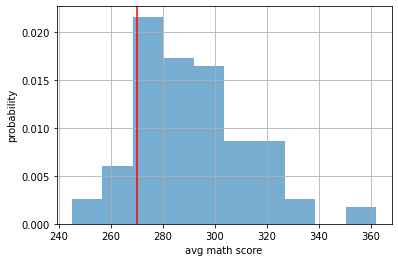

In [0]:
import matplotlib.pyplot as plt

ax = avg_score.hist(density = True, alpha = .6)
ax.set(xlabel = 'avg math score', ylabel = 'probability')
ax.axvline(270, label='pyplot vertical line', color = 'red')
cdf_fig = plt.gcf()

To calculate $P(X \le 280)$ we can add area of the histogram to the left of the red line.  In this case, that area equals .14.

### Summary

In this lesson, we have focused on using the PDF and CDF for a random variable.  The probability **probability distribution function** is a  function that provides the probabilities of occurrence of different possible outcomes for a random variable.  For a continuous random variable we call this a probability density function.

> We can use our PDF to answer questions like: $P(X = 280)$.

The cumulative distribution function (CDF) of a random variable $X$  is the probability that $X$  will take a value less than or equal to a value $x$.

> We can use our CDF to answer questions like: $P(X \le 280)$.

We can calculate the CDF by looking at the area under our PDF below value of $x$.  For example, in the graph below, where we calculate $P(X \le 280)$, we do so by finding the area to the left of the red line.

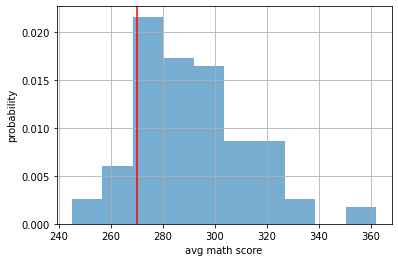

In [0]:
cdf_fig